The goal here is to evaluate the errors introduced adversarial training by a analyzing the added noise

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [2]:
origWeights = np.load('origWeights.npy')
modifiedWeights = np.load('modifiedWeights.npy')
origBiases = np.load('origBiases.npy')
modifiedBiases = np.load('modifiedBiases.npy')

In [3]:
def compute_minAndMax(listArrays):
    '''
    Function to find the smallest and largest elements 
    in a list of numpy arrays
    '''
    minVal = np.inf
    maxVal = -np.inf
    for arr in listArrays:
        if arr.min() < minVal:
            minVal = arr.min()
        if arr.max() > maxVal:
            maxVal = arr.max()
    return minVal, maxVal

In [4]:
def measure_noise(origValues, modifiedValues):
    noiseValues = []
    for origArr, modifiedArr in zip(origValues, modifiedValues):
        # error_arr is the element-wise difference of all values in the array
        errorArr = origArr - modifiedArr
        noiseValues.append(errorArr)
    return noiseValues

In [5]:
# mnist images are grayscale, so the depth is 1. In cifar10, depth is 3.
# The first 5 layers are convolutional layers in case of cifar10 while 
# only the first 3 are in case of mnist.
if origWeights[0].shape[2] == 1:
    numConvLayers = 3
else:
    numConvLayers = 5
r = measure_noise(origWeights[:numConvLayers], modifiedWeights[:numConvLayers])
min_noise, max_noise = compute_minAndMax(r)
print(min_noise, max_noise)

-0.0041182414 0.00488054


In [6]:
for layer in r:
    print(layer.T.shape)
allMatrices = []
colors = []
if numConvLayers == 3:
    color = ['r', 'g', 'b']
else:
    color = ['r', 'g', 'b', 'y', 'c']

for layer,c in zip(r,color):
    for filter in layer.T:
        for matrix in filter:
            allMatrices.append(matrix.flatten())
            colors.append(c)
allMatrices_tsne = TSNE(n_components=2, perplexity=100, n_iter=1200).fit_transform(allMatrices)
print(allMatrices_tsne.shape)

(32, 1, 3, 3)
(64, 32, 3, 3)
(64, 64, 3, 3)
(6176, 2)


Text(0.5, 1.0, 'Model Noise')

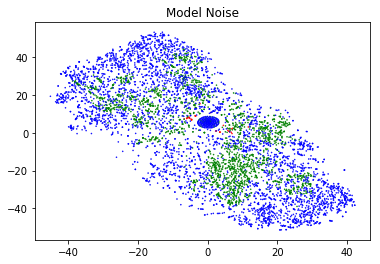

In [7]:
allMatrices_x, allMatrices_y = allMatrices_tsne.T
#plt.figure(figsize=(20,20))
plt.scatter(allMatrices_x, allMatrices_y, s=0.3, c=colors)
plt.title('Model Noise')

Text(0.5, 1.0, 'Model Noise')

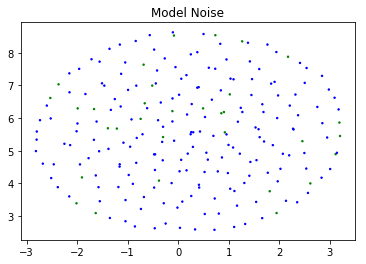

In [13]:
# Code to isolate the circular pattern from the plot
# Using 4 threshold values, I isolate the rectangular 
# region of the plot which contains the circular pattern
x_range = (-3,+3.5)
y_range = (1.9,9)
indices = (allMatrices_x < x_range[1]) * (allMatrices_y < y_range[1]) * \
(allMatrices_x > x_range[0]) * (allMatrices_y > y_range[0])

# Plot the isolated pattern to verify that circular pattern 
# was correctly isolated
colors = np.array(colors)
plt.scatter(allMatrices_x[indices], allMatrices_y[indices], c = colors[indices], s=2)
plt.title('Model Noise')

In [14]:
len(np.nonzero(indices)[0])

225

In [15]:
np.nonzero(indices)[0]

array([  96,   97,   98,   99,  100,  101,  102,  103,  104,  105,  106,
        107,  108,  109,  110,  111,  112,  113,  114,  115,  116,  117,
        118,  119,  120,  121,  122,  123,  124,  125,  126,  127, 2082,
       2146, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217,
       2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228,
       2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239,
       2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250,
       2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261,
       2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2274,
       2338, 2402, 2466, 2530, 2594, 2658, 2722, 2786, 2850, 2914, 2978,
       3042, 3082, 3106, 3170, 3234, 3298, 3362, 3426, 3490, 3554, 3618,
       3682, 3746, 3810, 3874, 3938, 4002, 4066, 4130, 4170, 4194, 4258,
       4322, 4386, 4450, 4514, 4578, 4642, 4706, 4770, 4834, 4898, 4960,
       4961, 4962, 4963, 4964, 4965, 4966, 4967, 49

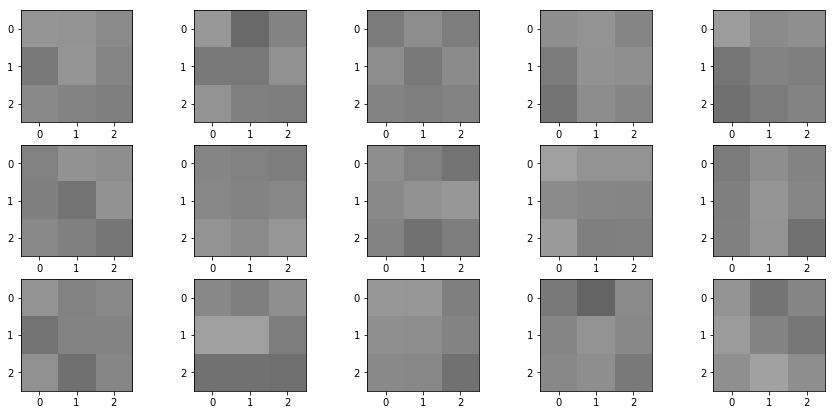

In [49]:
# Visualize the filters before and after the attack
min_orig, max_orig = compute_minAndMax(origWeights[:numConvLayers])
layer3 = np.transpose(origWeights[2])
f, axarr = plt.subplots(3,5, figsize=(15,7))
for num in range(15):
    axarr[num//5][num%5].imshow(layer3[30][num], cmap='gray', vmin=min_orig, vmax=max_orig)
plt.show()

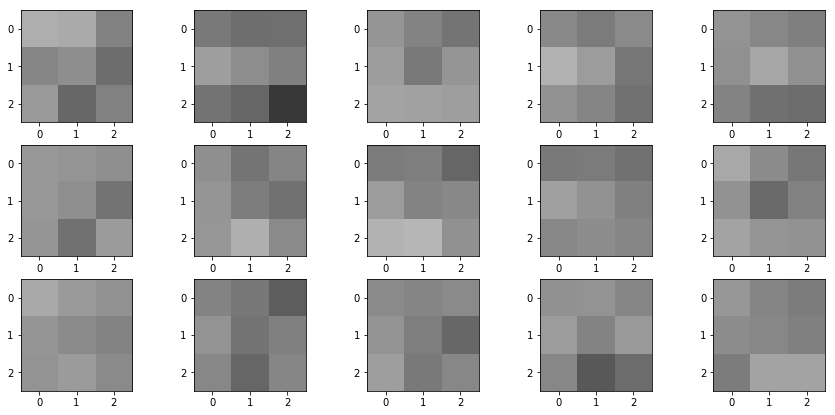

In [47]:
# Visualize the filters before and after the attack
min_mod, max_mod = compute_minAndMax(modifiedWeights[:numConvLayers])
layer3 = np.transpose(modifiedWeights[2])
f, axarr = plt.subplots(3,5, figsize=(15,7))
for num in range(15):
    axarr[num//5][num%5].imshow(layer3[50][num], cmap='gray', vmin=min_mod, vmax=max_mod)
plt.show()

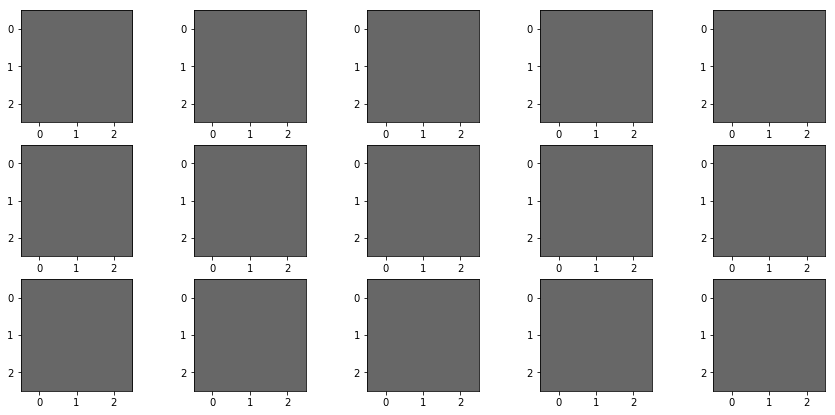

In [55]:
# Visualize the filters before and after the attack
layer3 = np.transpose(r[2])
f, axarr = plt.subplots(3,5, figsize=(15,7))
for num in range(15):
    axarr[num//5][num%5].imshow(layer3[47][num], cmap='gray', vmin=min_noise, vmax=max_noise)
plt.show()

In [ ]:
allMatrices[100]

In [32]:
layer3 = np.transpose(origWeights[2])
layer3[30][0].shape

(3, 3)

In [ ]:
allRandom = []
for i in range(6176):
    randomFilter = (max_noise - min_noise) * np.random.random((3,3)) + min_noise
    allRandom.append(randomFilter.flatten())
allRandom_tsne = TSNE(n_components=2, perplexity=40, n_iter=1200).fit_transform(allRandom)

In [ ]:
allRandom_x, allRandom_y = allRandom_tsne.T
plt.scatter(allRandom_x, allRandom_y, s=0.3)
plt.title('Random Noise')

In [ ]:
allMatrices.append(allRandom)
print(len(allMatrices))

In [ ]:
H = np.transpose(r[2])
f, axarr = plt.subplots(2,5, figsize=(15,7))
for num in range(10):
    axarr[num//5][num%5].imshow(H[num][0], cmap='gray', vmin=min_noise, vmax=max_noise)
plt.show()

In [ ]:
f, axarr = plt.subplots(2,5, figsize=(15,7))
for num in range(10):
    H = (max_noise - min_noise) * np.random.random((3,3)) + min_noise
    axarr.ravel()[num].imshow(H, cmap='gray', vmin=min_noise, vmax=max_noise)
plt.show()